In [132]:
# Q: 주어진 값들을 이용해서 M_10 의 출국 숫자와 F_50의 출국자 숫자를 예측하는
#    딥러닝 모형을 만들어라. 평균 오차율=(예측값-실제값)/실제값*100;

# 데이터 처리 및 시각화
import pandas as pd
# 회기분석
from statsmodels.formula.api import ols

In [133]:
# 데이터 불러오기
df = pd.read_csv('data.csv')
df.head(3) # 년도/ 남자 10대~80대 및 여자 10대~80대 출국한 인구수

,YM,M_10,M_20,M_30,M_40,M_50,M_60,M_70,M_80,F_10,F_20,F_30,F_40,F_50,F_60,F_70,F_80
0,201101,20055,57511,63426,109815,123668,80658,26896,6368,18554,56586,90068,75919,75133,55318,19640,5410
1,201102,18444,33012,54383,103162,109919,73798,26203,5879,17529,34433,79658,66642,59621,52168,20212,5359
2,201103,8430,8115,41100,103781,96896,63894,27747,6196,8141,7785,53713,48062,39323,56353,26444,5534


In [201]:
# 예시) 종속변수: 남자10대, 독립변수: 남자 20대
res = ols('M_10 ~ M_20', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   M_10   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     90.61
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           6.78e-16
Time:                        22:34:20   Log-Likelihood:                -1155.7
No. Observations:                 108   AIC:                             2315.
Df Residuals:                     106   BIC:                             2321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.878e+04   1846.896     10.170      0.000    1.51e+04    2.24e+04
M_20           0.3579      0.038      9.519      0.000       0.283       0.432
==============================================================================
Omnibus:                       14.127   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.184
Skew:                           0.438   Prob(JB):                       0.0275
Kurtosis:                       2.089   Cond. No.                     8.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
# M_10 = 0.35787448606888916 * M_20 + 18782.607975257146, p=0(p<0.05)=> 통계적 유의미.
# Adj. R-squared: 0.456
# 독립변수가 여러 개인 다중회귀분석에서 사용
# 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정
# 서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다
print("절편: ", res.params.Intercept)   ## 절편
print("기울기: ", res.params.M_20)      ## 기울기

절편:  18782.607975257146
기울기:  0.35787448606888916


In [136]:
# M_10 = 0.35787448606888916 * M_20 + 18782.60797525714
# 평균 오차율 구하기
# 평균 오차율=(예측값-실제값)/실제값*100
rateM20 = ((0.35787448606888916 * df['M_20'] + 18782.607975257146- df.M_10)/df.M_10 * 100).mean()
rateM20

14.335449980905514

<pre> 조합으로 변형 출력 </pre>

In [139]:
# 자동으로 모든 조합을 구해보자
# 예시
items = ['1', '2', '3', '4', '5']
from itertools import combinations
l = []
for i in range(1,6):
    l.append(list(combinations(items, i)))
print(*l)

[('1',), ('2',), ('3',), ('4',), ('5',)] [('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '4'), ('3', '5'), ('4', '5')] [('1', '2', '3'), ('1', '2', '4'), ('1', '2', '5'), ('1', '3', '4'), ('1', '3', '5'), ('1', '4', '5'), ('2', '3', '4'), ('2', '3', '5'), ('2', '4', '5'), ('3', '4', '5')] [('1', '2', '3', '4'), ('1', '2', '3', '5'), ('1', '2', '4', '5'), ('1', '3', '4', '5'), ('2', '3', '4', '5')] [('1', '2', '3', '4', '5')]


In [140]:
# 원소 하나씩 꺼내기
for i in list(combinations(items, 2)):
    print(i[0], i[1], end="/ ")

1 2/ 1 3/ 1 4/ 1 5/ 2 3/ 2 4/ 2 5/ 3 4/ 3 5/ 4 5/ 

In [141]:
# 꺼낸 조합을 문자열로 변형시키기
for li in list(combinations(items, 2)):
    print("+".join(li))

1+2
1+3
1+4
1+5
2+3
2+4
2+5
3+4
3+5
4+5


In [142]:
L = []
for i in range(1,6):
    for li in list(combinations(items, i)):
        L.append(("+".join(li)))
print(L)

['1', '2', '3', '4', '5', '1+2', '1+3', '1+4', '1+5', '2+3', '2+4', '2+5', '3+4', '3+5', '4+5', '1+2+3', '1+2+4', '1+2+5', '1+3+4', '1+3+5', '1+4+5', '2+3+4', '2+3+5', '2+4+5', '3+4+5', '1+2+3+4', '1+2+3+5', '1+2+4+5', '1+3+4+5', '2+3+4+5', '1+2+3+4+5']


<pre> 적용 ?</pre>

In [153]:
# items란 list에 남자/여자10대~80대 집어넣기
# items에서 년도와 종속변수 제거(M_10)
items = []
for col in df.columns:
    items.append(col)
items.remove('YM')
items.remove('M_10')
items.remove('F_50')
print(items)

['M_20', 'M_30', 'M_40', 'M_50', 'M_60', 'M_70', 'M_80', 'F_10', 'F_20', 'F_30', 'F_40', 'F_60', 'F_70', 'F_80']


In [154]:
# variable라는 list에 조합을 넣음
variable_list = []
col = []
for i in range(1, len(items) + 1):
    for li in list(combinations(items, i)):
        variable_list.append(("+".join(li)))
        col.append(li)

In [192]:
# 들어가는 예시
'M_10 ~ '+variable_list[60]

'M_10 ~ M_60+M_70'

In [190]:
col[60][0]

'M_60'

In [157]:
from tqdm import tqdm
rate_M = []
rate_F = []
elements = []
for idx, variable in enumerate(tqdm(variable_list)):
    exp_M10 = 0
    exp_F50 = 0
    res_M = ols('M_10 ~ '+variable, data=df).fit()
    res_F = ols('F_50 ~ '+variable, data=df).fit()
    # lenear 식 만들어주기 exp = a*x1+b*x2+c*x3+...+y절편
    for i in range(len(col[idx])):
        exp_M10 += res_M.params[col[idx][i]] * df[col[idx][i]]
        exp_F50 += res_F.params[col[idx][i]] * df[col[idx][i]]
    exp_M10 += res_M.params.Intercept
    exp_F50 += res_F.params.Intercept
    rate_M.append(((exp_M10-df.M_10)/df.M_10 * 100).mean())
    rate_F.append(((exp_F50-df.F_50)/df.F_50 * 100).mean())
    elements.append(variable)

100%|██████████| 16383/16383 [20:10<00:00, 13.54it/s]


In [158]:
# 데이터프레임화하기
result = pd.DataFrame({'남자평균오차율': rate_M, '여자평균오차율':rate_F, '변수':elements})
result.head()

,남자평균오차율,여자평균오차율,변수
0,14.335450,8.065413,M_20
1,4.363050,3.171624,M_30
2,7.304076,5.783154,M_40
3,5.097331,0.992933,M_50
4,7.855922,1.619785,M_60


In [159]:
result.to_csv("data_rate.csv")

In [160]:
# 문제점 발견: 평균오차율이 음수가 나온경우
result.sort_values(by=['남자평균오차율'], axis=0).head(3)

,남자평균오차율,여자평균오차율,변수
9398,-0.474286,-0.222099,M_40+M_60+M_70+M_80+F_40+F_60+F_70
5813,-0.456565,-0.212359,M_40+M_60+M_70+F_40+F_60+F_70
5814,-0.398900,-0.218746,M_40+M_60+M_70+F_40+F_60+F_80


In [161]:
# 남자/여자평균오차율 절대값으로 넣기
result_abs = result
result_abs['남자평균오차율'] = result_abs['남자평균오차율'].abs()
result_abs['여자평균오차율'] = result_abs['여자평균오차율'].abs()

In [162]:
result_abs.sort_values(by=['남자평균오차율'], axis=0).head(1)

,남자평균오차율,여자평균오차율,변수
6389,0.000011,0.081636,M_60+F_20+F_40+F_60+F_70+F_80


In [163]:
result_abs.sort_values(by=['여자평균오차율'], axis=0).head(1)

,남자평균오차율,여자평균오차율,변수
6044,0.059967,0.000007,M_50+M_60+M_70+F_10+F_40+F_70


In [165]:
# 절대값 남자평균오차율이 가장 작은 경우는
# 독립변수: M_60+F_20+F_40+F_60+F_70+F_80 가 들어갔을 경우이다.
res = ols('M_10 ~ M_60+F_20+F_40+F_60+F_70+F_80', data=df).fit()
print(res.params.Intercept, res.params.M_60,
      res.params.F_20, res.params.F_40, res.params.F_60,
      res.params.F_70, res.params.F_80)

-6622.76579437303 -0.041794465391758184 0.1695262838788073 0.36838200302226853 -0.12880466399708246 0.027442108486847472 0.5812602087649341


<pre> M_10 = -0.041794465391758184*M_60 + 0.1695262838788073*F_20
+ 0.36838200302226853*F_40 - 0.12880466399708246*F_60 + 
0.027442108486847472*F_70 + 0.5812602087649341*F_80 - 
6622.76579437303 </pre>

In [166]:
# 절대값 여자평균오차율이 가장 작은 경우는
# 독립변수: M_50+M_60+M_70+F_10+F_40+F_70 가 들어갔을 경우이다.
res = ols('F_50 ~ M_50+M_60+M_70+F_10+F_40+F_70', data=df).fit()
print(res.params.Intercept, res.params.M_50,
      res.params.M_60, res.params.M_70, res.params.F_10,
      res.params.F_40, res.params.F_70)

-24365.504586027906 -0.09433764936744815 1.5215552726349033 -1.2525422552285213 1.8835609546403846 -0.4253303657544696 0.3953147871555931


<pre> F_50 = -0.09433764936744815*M_50 + 1.5215552726349033*M_60
- 1.2525422552285213*M_70 + 1.8835609546403846*F_10 - 
0.4253303657544696*F_40 + 0.3953147871555931*F_70 - 
24365.504586027906 </pre>

In [167]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams.update({'text.color': "white",
                    'axes.labelcolor': "white",
                     'xtick.color': "white",
                     'ytick.color': "white"
                     })

In [186]:
# 숫자형 날짜 다시 넣어주기
df['YM'] = df['YM'].astype(str)
df['YM'] = pd.to_datetime(df['YM'], format='%Y%m')
df.head(3)

,YM,M_10,M_20,M_30,M_40,M_50,M_60,M_70,M_80,F_10,F_20,F_30,F_40,F_50,F_60,F_70,F_80
0,2011-01-01,20055,57511,63426,109815,123668,80658,26896,6368,18554,56586,90068,75919,75133,55318,19640,5410
1,2011-02-01,18444,33012,54383,103162,109919,73798,26203,5879,17529,34433,79658,66642,59621,52168,20212,5359
2,2011-03-01,8430,8115,41100,103781,96896,63894,27747,6196,8141,7785,53713,48062,39323,56353,26444,5534


c:\Users\lunaw\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


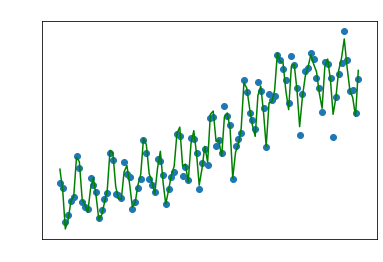

In [187]:
plt.scatter(df.YM, df.M_10, marker='o')
M_10 = -0.041794465391758184*df.M_60 + 0.1695262838788073*df.F_20 + 0.36838200302226853*df.F_40 - 0.12880466399708246*df.F_60 + 0.027442108486847472*df.F_70 + 0.5812602087649341*df.F_80 - 6622.76579437303
plt.plot(df.YM, M_10, 'g-')
plt.title('10대 남자')
plt.show()

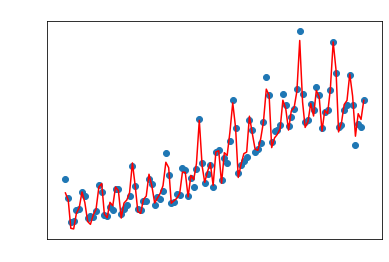

In [188]:
plt.scatter(df.YM, df.F_50, marker='o')
F_50 = -0.09433764936744815*df.M_50 + 1.5215552726349033*df.M_60 - 1.2525422552285213*df.M_70 + 1.8835609546403846*df.F_10 - 0.4253303657544696*df.F_40 + 0.3953147871555931*df.F_70 - 24365.504586027906
plt.plot(df.YM, F_50, 'r-')
plt.title('50대 여자')
plt.show()